In [27]:
import sys
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from copy import deepcopy
from scipy.spatial.distance import squareform

rcParams = {'font.size': 24 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}


In [28]:
df_dist_mat = pd.read_csv('/Users/harihara/Mount/CMSC829A/Data/Core_Gene_RF_Matrix_MP.txt', sep = "\t")
del df_dist_mat['Unnamed: 0']
dist_mat = pd.pivot_table(df_dist_mat, columns = 'Taxa2', values = 'RF',index = 'Taxa1')
index = dist_mat.index.union(dist_mat.columns)
dist_mat = dist_mat.reindex(index=index, columns=index)
genes = dist_mat.columns.tolist()
dist_mat = dist_mat.loc[genes, genes].values
print(dist_mat)

[[0.         0.61904762 0.64188267 ... 0.63298969 0.59357923 0.63710778]
 [0.61904762 0.         0.57206538 ... 0.66641847 0.61904762 0.64338782]
 [0.64188267 0.57206538 0.         ... 0.69135802 0.65167007 0.6575902 ]
 ...
 [0.63298969 0.66641847 0.69135802 ... 0.         0.64423077 0.67969822]
 [0.59357923 0.61904762 0.65167007 ... 0.64423077 0.         0.64417178]
 [0.63710778 0.64338782 0.6575902  ... 0.67969822 0.64417178 0.        ]]


/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


61


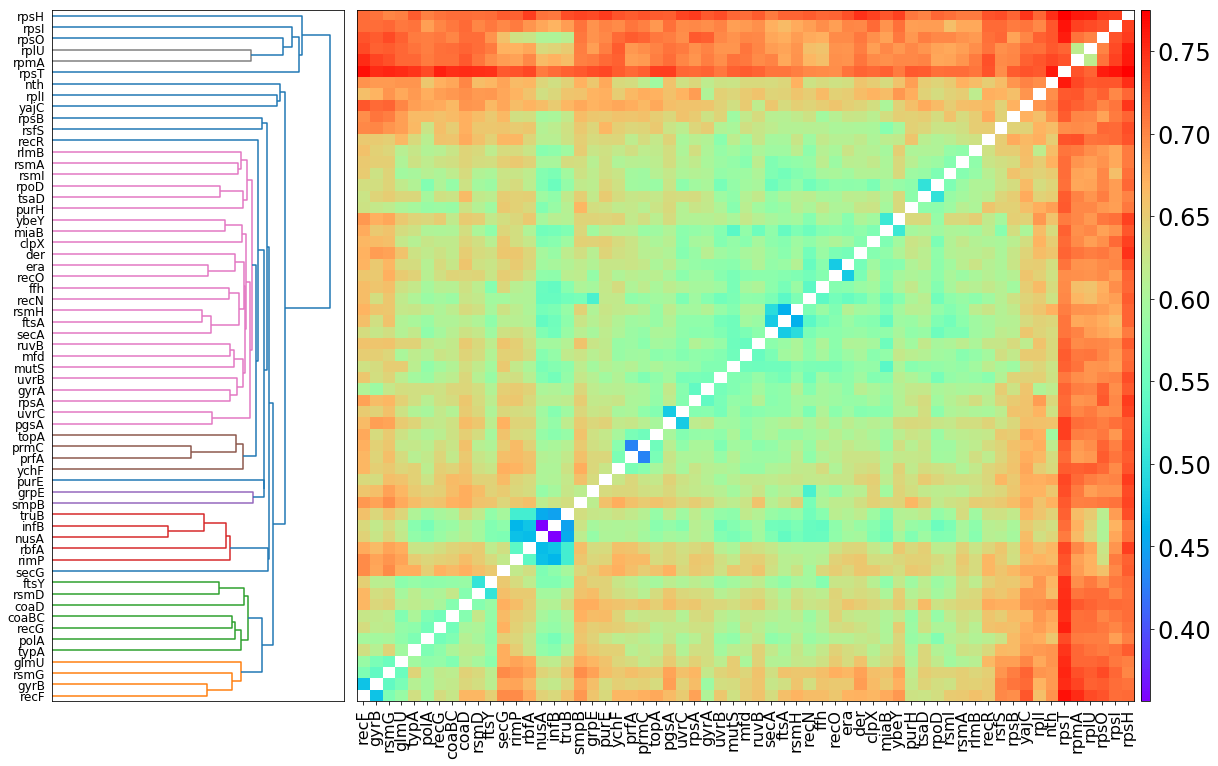

In [29]:
plt.rcParams.update(rcParams)

MAT = dist_mat

fig = plt.figure(figsize=(18,12))
axdendro = fig.add_axes([0.09,0.1,0.225,0.8])
Y = sch.linkage(MAT, method='average',optimal_ordering=True)
Z = sch.dendrogram(Y, orientation='right', color_threshold = 0.725*max(Y[:,2]))
index = Z['leaves']
ticks = []
for f in genes:
    ticks.append(f.replace("RAxML_bestTree.T_",""))
print(len(ticks))
ticks = np.array(ticks)
ticks = list(ticks[index])
axdendro.set_xticks([])
axdendro.set_yticklabels(ticks, size = 12)
c, cophenet_dist = sch.cophenet(Y, squareform(MAT))

# Plot distance matrix.
axmatrix = fig.add_axes([0.325,0.1,0.6,0.8])

MAT = MAT[index,:]
MAT = MAT[:,index]
MAT[MAT == 0] = np.inf
im = axmatrix.imshow(MAT, aspect='auto', origin='lower', cmap = 'rainbow')
axmatrix.set_xticks(list(range(0, len(ticks))))
axmatrix.set_xticklabels(ticks, rotation = 90, size = 16)
axmatrix.xaxis.set_ticks_position('bottom')
ng = len(genes)

axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.93,0.1,0.0075,0.8])
plt.colorbar(im, cax=axcolor)

#fig.tight_layout()

fig.savefig('/Users/harihara/UMD_Coursework/Fall_2021/CMSC829A/Project/Plots/Core_Gene_Tree_Clustering.pdf')

In [30]:
print(c)

0.8348479947704859
